In [ ]:
# The output generated from the `EDA_analysis_enterotyping_0h.ipynb` notebook was compiled into the `Enterotype_summary.xlsx` file.  
# This file was then used for the subsequent analyses described below.

In [ ]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.colors as mcolors


plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

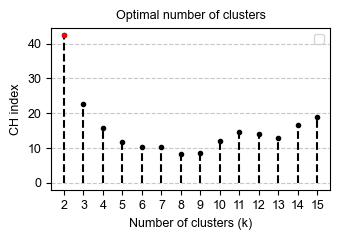

In [ ]:
# Figure S1 (CH index)

df = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Enterotype_clustering_ncluster')

max_index = df['nclusters_ch'].idxmax()
max_k = df['Kcluster'][max_index]
max_value = df['nclusters_ch'][max_index]

plt.figure(figsize=(3.5, 2.5))
markerline, stemlines, baseline = plt.stem(df['Kcluster'], df['nclusters_ch'], linefmt='k--', markerfmt='ko', basefmt=' ')
markerline.set_markersize(3)

plt.scatter(max_k, max_value, color='red', s=7, zorder=5,)

plt.title("Optimal number of clusters", fontsize=9)
plt.xlabel("Number of clusters (k)", fontsize=9)
plt.ylabel("CH index", fontsize=9)
plt.xticks(df['Kcluster'], fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('./Figures/CH.png', dpi=600)
plt.show()


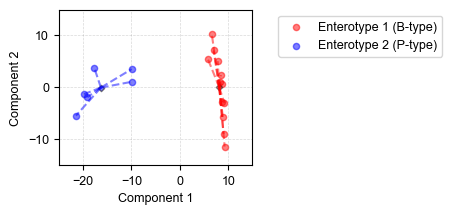

In [ ]:
# Figure 1A

data = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Enterotype')


X = data[['PC1', 'PC2']].values
y = data['group'].values

centers = np.array([X[y == label].mean(axis=0) for label in np.unique(y)])

plt.figure(figsize=(4.8, 2.3))
colors = ['Red', 'Blue']
# colors = ['lightcoral','royalblue']


labels = ['Enterotype 1 (B-type)', 'Enterotype 2 (P-type)']

for i, label in enumerate(np.unique(y)):
    group_points = X[y == label]
    plt.scatter(group_points[:, 0], group_points[:, 1], c=colors[i], label=labels[i], s=20, alpha=0.5)
    plt.scatter(centers[i][0], centers[i][1], c=colors[i], marker='D', edgecolor='black', s=10, alpha=0.5)

    # 각 점과 중앙 좌표 사이의 거리를 선으로 그립니다.
    for point in group_points:
        plt.plot([centers[i][0], point[0]], [centers[i][1], point[1]], c=colors[i], linestyle='--', alpha=0.5)
        

plt.xlabel('Component 1', fontsize=9)
plt.ylabel('Component 2', fontsize=9)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=9)
plt.ylim([-15, 15])
plt.xlim([-25, 15])

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()

plt.savefig('./Figures/enterotype.png', dpi=600)
plt.show()

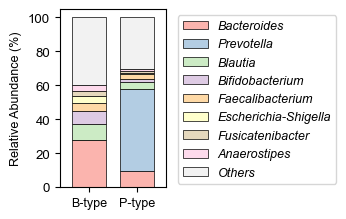

In [ ]:
# Figure 1B

df_group_tax = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Merge_top8')

df_group_tax.plot(kind='bar', stacked=True,figsize=(3.65, 2.3), colormap='Pastel1', edgecolor='k', linewidth=0.5, width=0.7)
plt.xticks([0, 1], ['B-type', 'P-type'], rotation=0, fontsize=9)
plt.yticks(fontsize=9.5)
plt.ylabel('Relative Abundance (%)', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=9, prop={'style': 'italic', 'size':9})
plt.tight_layout()
plt.savefig('./Figures/enterotype_genus_relative_abundance.png', dpi=600)
plt.show()

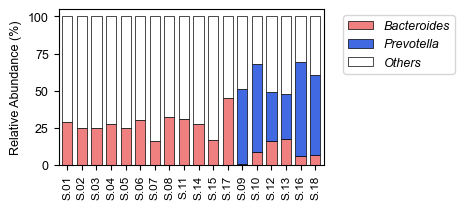

In [ ]:
# Figure 1C

# print(sample_names)
# df_top_sort, df_top_sort_raw, cluster_dict = cluster_sorting(df_top_20, labels)

df_sample_top_10 = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Enterotype_sample_top_rev')

df_sample_top_10.set_index('index', inplace=True)

df_sample_top_10.plot(kind='bar', stacked=True, figsize=(4.8, 2.2), color=['lightcoral', 'royalblue', 'white'], edgecolor='k', linewidth=0.5, width=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=8, prop={'style': 'italic', 'size':9})

plt.ylabel('Relative Abundance (%)', fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=90, fontsize=8.5)
plt.xlabel('')

plt.tight_layout()
plt.savefig('./Figures/dominant.png', dpi=600)

plt.show()

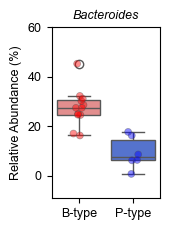

In [ ]:
# Figure 1D


df_sample_tax = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Enterotype_sample_top_rev')


feat = 'Bacteroides'
orders = ['B-type', 'P-type']
g_colors = ['lightcoral', 'royalblue']

plt.figure(figsize=(1.8, 2.4))
sns.stripplot(data=df_sample_tax, x='Label', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=['red', 'blue'], order=orders, alpha=0.45)
sns.boxplot(data=df_sample_tax, x='Label', y=feat, order=orders, palette=g_colors)

plt.ylim([-9, 60])
plt.xlabel('')
plt.ylabel('Relative Abundance (%)', fontsize=9)
# plt.ylabel('')
plt.title("Bacteroides", fontsize=9, fontstyle='italic')
plt.xticks([0, 1], ['B-type', 'P-type'], rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('./Figures/Bacteroides.png', dpi=600)

plt.show()

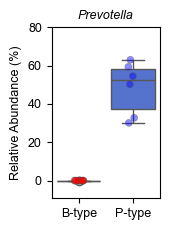

In [ ]:
# Figure 1E

df_sample_tax = pd.read_excel('./Enterotype_summary.xlsx', sheet_name='Enterotype_sample_top_rev')


feat = 'Prevotella'
orders = ['B-type', 'P-type']
g_colors = ['lightcoral', 'royalblue']

plt.figure(figsize=(1.8, 2.4))
sns.stripplot(data=df_sample_tax, x='Label', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=['red', 'blue'], order=orders, alpha=0.45)
sns.boxplot(data=df_sample_tax, x='Label', y=feat, order=orders, palette=g_colors)

plt.ylim([-9, 80])
plt.xlabel('')
plt.ylabel('Relative Abundance (%)', fontsize=9)
# plt.ylabel('')
plt.title("Prevotella", fontsize=9, fontstyle='italic')
plt.xticks([0, 1], ['B-type', 'P-type'], rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('./Figures/Prevotella.png', dpi=600)

plt.show()